In [1]:
import nltk
import string 
import nltk
import gensim
import spacy

import pandas as pd 
ts_lyrics = pd.read_csv("/Users/davidebonaglia/Dropbox/PhD NOTES/COURSES/Utretch Summer School/Monday/taylor_swift_lyrics.csv")


In [2]:
ts_lyrics

,Artist,Album,Title,Lyrics
0,Taylor Swift,Taylor Swift,Tim McGraw,He said the way my blue eyes shinx\nPut those ...
1,Taylor Swift,Taylor Swift,Picture to Burn,"State the obvious, I didn't get my perfect fan..."
2,Taylor Swift,Taylor Swift,Teardrops on my Guitar,"Drew looks at me,\nI fake a smile so he won't ..."
3,Taylor Swift,Taylor Swift,A Place in This World,"I don't know what I want, so don't ask me\n'Ca..."
4,Taylor Swift,Taylor Swift,Cold As You,You have a way of coming easily to me\nAnd whe...
...,...,...,...,...
127,Taylor Swift,folklore,mad woman,What did you think I'd say to that?\nDoes a sc...
128,Taylor Swift,folklore,epiphany,"Keep your helmet\nKeep your life, son\nJust a ..."
129,Taylor Swift,folklore,betty,"Betty, I won't make assumptions about why you ..."
130,Taylor Swift,folklore,peace,Our coming of age has come and gone\nSuddenly ...


In [3]:
#Add a new column to the dataframe and name it Preprocessed Lyrics, 
#then fill the column out with the preprocessed text including the steps in this and the following questions. 


#1. First replace the '\n' notations with a space character.

import re

def remove_linebreaks(text):
    return re.sub(r'\n', ' ', text)

ts_lyrics["preprocessed_lyrics"] = ts_lyrics["Lyrics"].apply(lambda text: remove_linebreaks(text))
ts_lyrics

,Artist,Album,Title,Lyrics,preprocessed_lyrics
0,Taylor Swift,Taylor Swift,Tim McGraw,He said the way my blue eyes shinx\nPut those ...,He said the way my blue eyes shinx Put those G...
1,Taylor Swift,Taylor Swift,Picture to Burn,"State the obvious, I didn't get my perfect fan...","State the obvious, I didn't get my perfect fan..."
2,Taylor Swift,Taylor Swift,Teardrops on my Guitar,"Drew looks at me,\nI fake a smile so he won't ...","Drew looks at me, I fake a smile so he won't s..."
3,Taylor Swift,Taylor Swift,A Place in This World,"I don't know what I want, so don't ask me\n'Ca...","I don't know what I want, so don't ask me 'Cau..."
4,Taylor Swift,Taylor Swift,Cold As You,You have a way of coming easily to me\nAnd whe...,You have a way of coming easily to me And when...
...,...,...,...,...,...
127,Taylor Swift,folklore,mad woman,What did you think I'd say to that?\nDoes a sc...,What did you think I'd say to that? Does a sco...
128,Taylor Swift,folklore,epiphany,"Keep your helmet\nKeep your life, son\nJust a ...","Keep your helmet Keep your life, son Just a fl..."
129,Taylor Swift,folklore,betty,"Betty, I won't make assumptions about why you ...","Betty, I won't make assumptions about why you ..."
130,Taylor Swift,folklore,peace,Our coming of age has come and gone\nSuddenly ...,Our coming of age has come and gone Suddenly t...


In [4]:
#2. Write another custom function to remove the punctuations. 
#You can use the previous method or make use of the function maketrans from the string package.

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

ts_lyrics["preprocessed_lyrics"] = ts_lyrics["preprocessed_lyrics"].apply(lambda text: remove_punctuation(text))
ts_lyrics

,Artist,Album,Title,Lyrics,preprocessed_lyrics
0,Taylor Swift,Taylor Swift,Tim McGraw,He said the way my blue eyes shinx\nPut those ...,He said the way my blue eyes shinx Put those G...
1,Taylor Swift,Taylor Swift,Picture to Burn,"State the obvious, I didn't get my perfect fan...",State the obvious I didnt get my perfect fanta...
2,Taylor Swift,Taylor Swift,Teardrops on my Guitar,"Drew looks at me,\nI fake a smile so he won't ...",Drew looks at me I fake a smile so he wont see...
3,Taylor Swift,Taylor Swift,A Place in This World,"I don't know what I want, so don't ask me\n'Ca...",I dont know what I want so dont ask me Cause I...
4,Taylor Swift,Taylor Swift,Cold As You,You have a way of coming easily to me\nAnd whe...,You have a way of coming easily to me And when...
...,...,...,...,...,...
127,Taylor Swift,folklore,mad woman,What did you think I'd say to that?\nDoes a sc...,What did you think Id say to that Does a scorp...
128,Taylor Swift,folklore,epiphany,"Keep your helmet\nKeep your life, son\nJust a ...",Keep your helmet Keep your life son Just a fle...
129,Taylor Swift,folklore,betty,"Betty, I won't make assumptions about why you ...",Betty I wont make assumptions about why you sw...
130,Taylor Swift,folklore,peace,Our coming of age has come and gone\nSuddenly ...,Our coming of age has come and gone Suddenly t...


In [10]:
#3. Change all the characters to their lower forms. 

ts_lyrics["preprocessed_lyrics"] = ts_lyrics["preprocessed_lyrics"].str.lower()
ts_lyrics

,Artist,Album,Title,Lyrics,preprocessed_lyrics
0,Taylor Swift,Taylor Swift,Tim McGraw,He said the way my blue eyes shinx\nPut those ...,he said the way my blue eyes shinx put those g...
1,Taylor Swift,Taylor Swift,Picture to Burn,"State the obvious, I didn't get my perfect fan...",state the obvious i didnt get my perfect fanta...
2,Taylor Swift,Taylor Swift,Teardrops on my Guitar,"Drew looks at me,\nI fake a smile so he won't ...",drew looks at me i fake a smile so he wont see...
3,Taylor Swift,Taylor Swift,A Place in This World,"I don't know what I want, so don't ask me\n'Ca...",i dont know what i want so dont ask me cause i...
4,Taylor Swift,Taylor Swift,Cold As You,You have a way of coming easily to me\nAnd whe...,you have a way of coming easily to me and when...
...,...,...,...,...,...
127,Taylor Swift,folklore,mad woman,What did you think I'd say to that?\nDoes a sc...,what did you think id say to that does a scorp...
128,Taylor Swift,folklore,epiphany,"Keep your helmet\nKeep your life, son\nJust a ...",keep your helmet keep your life son just a fle...
129,Taylor Swift,folklore,betty,"Betty, I won't make assumptions about why you ...",betty i wont make assumptions about why you sw...
130,Taylor Swift,folklore,peace,Our coming of age has come and gone\nSuddenly ...,our coming of age has come and gone suddenly t...


In [12]:
#List the 20 most frequent terms in this dataframe

from collections import Counter

# To get all lyrics in one text, we can concatenate all of them using the " ".join(list) syntax, 
# which joins all elements in a list separating them by whitespace.
text = " ".join(lyric for lyric in ts_lyrics["preprocessed_lyrics"])

# split() returns list of all the words in the string
split_it = text.split()
  
# Pass the split_it list to instance of Counter class.
Counter = Counter(split_it)
  
# most_common() produces k frequently encountered input values and their respective counts.
most_occur = Counter.most_common(30)
  
print(most_occur)

[('i', 2377), ('you', 2319), ('the', 1623), ('and', 1403), ('me', 885), ('to', 843), ('a', 787), ('in', 686), ('it', 674), ('my', 642), ('of', 492), ('your', 475), ('we', 441), ('that', 436), ('all', 436), ('but', 428), ('like', 406), ('im', 404), ('this', 394), ('know', 380), ('on', 374), ('be', 356), ('is', 355), ('so', 355), ('dont', 342), ('its', 322), ('oh', 322), ('was', 309), ('never', 294), ('when', 289)]


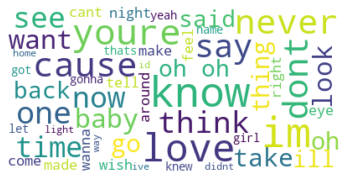

In [15]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [18]:
#Use the English stop word list from the nltk package to remove the stop words.

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

stop_words.update(["im", "youre", "id", "dont", "cant", "didnt", "ive", "ill", "hasnt"]) #add some other stopwords
#stop_words.discard('word') # this is when you want to remove a word from the list
print(stop_words)

{'ill', 'own', 'on', "doesn't", 'does', 'couldn', 'an', 'against', 'whom', 'his', 'cant', 'had', 'are', 'am', 'over', 'did', 'from', 'the', 'while', 'down', "you'll", 'up', 'there', 'most', 'so', 'after', 'off', 'but', "wouldn't", 'both', 'who', 'where', 'im', "shan't", 'how', "don't", 'is', 'here', 'yours', 'will', 'mightn', 'aren', 'those', 'hasn', 'can', 'herself', 'for', 'o', 'which', 'do', "wasn't", 'youre', "haven't", 'theirs', 'it', 't', "couldn't", 'all', 'than', "you've", 'themselves', 'through', "she's", "you're", "you'd", 'until', 'some', 'then', 'we', 'ain', "mustn't", 'between', 'their', 'again', 'them', 'same', 'with', 'wasn', "won't", 'don', 'having', 'have', 'and', 'under', "mightn't", 'should', 'mustn', 'ourselves', "it's", 'as', 'above', "should've", 'hasnt', 'once', 'himself', 'y', 'that', 'shan', 'too', 'wouldn', 'they', 'yourselves', 'id', 'her', 'nor', 'in', 'such', 'be', 'needn', 'ma', 'your', 'out', 'was', 'only', 'further', 'no', 'm', "hasn't", 'very', 'she', '

In [19]:
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in stop_words])

ts_lyrics["preprocessed_lyrics"] = ts_lyrics["preprocessed_lyrics"].apply(lambda text: remove_stopwords(text))
ts_lyrics

,Artist,Album,Title,Lyrics,preprocessed_lyrics
0,Taylor Swift,Taylor Swift,Tim McGraw,He said the way my blue eyes shinx\nPut those ...,said way blue eyes shinx put georgia stars sha...
1,Taylor Swift,Taylor Swift,Picture to Burn,"State the obvious, I didn't get my perfect fan...",state obvious get perfect fantasy realize love...
2,Taylor Swift,Taylor Swift,Teardrops on my Guitar,"Drew looks at me,\nI fake a smile so he won't ...",drew looks fake smile wont see want need every...
3,Taylor Swift,Taylor Swift,A Place in This World,"I don't know what I want, so don't ask me\n'Ca...",know want ask cause still trying figure know w...
4,Taylor Swift,Taylor Swift,Cold As You,You have a way of coming easily to me\nAnd whe...,way coming easily take take best start fight c...
...,...,...,...,...,...
127,Taylor Swift,folklore,mad woman,What did you think I'd say to that?\nDoes a sc...,think say scorpion sting fighting back strike ...
128,Taylor Swift,folklore,epiphany,"Keep your helmet\nKeep your life, son\nJust a ...",keep helmet keep life son flesh wound heres ri...
129,Taylor Swift,folklore,betty,"Betty, I won't make assumptions about why you ...",betty wont make assumptions switched homeroom ...
130,Taylor Swift,folklore,peace,Our coming of age has come and gone\nSuddenly ...,coming age come gone suddenly summer clear nev...


In [20]:
from collections import Counter

# To get all lyrics in one text, we can concatenate all of them using the " ".join(list) syntax, which joins all elements in a list separating them by whitespace.
text = " ".join(lyric for lyric in ts_lyrics["preprocessed_lyrics"])

# split() returns list of all the words in the string
split_it = text.split()
  
# Pass the split_it list to instance of Counter class.
Counter = Counter(split_it)
  
# most_common() produces k frequently encountered input values and their respective counts.
most_occur = Counter.most_common(20)
  
print(most_occur)

[('like', 406), ('know', 380), ('oh', 322), ('never', 294), ('love', 246), ('back', 240), ('time', 224), ('cause', 213), ('one', 177), ('say', 176), ('see', 170), ('got', 159), ('wanna', 158), ('think', 153), ('baby', 153), ('come', 150), ('go', 149), ('want', 142), ('ever', 134), ('could', 133)]


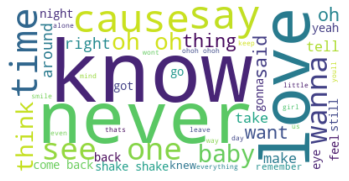

In [21]:
wordcloud = WordCloud(max_words=50, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [22]:
# We can apply stemming or lemmatization on our text data. Apply a lemmatizer from nltk and save the results.

from nltk.stem import WordNetLemmatizer
# run the code nltk.download('wordnet') if needed

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

ts_lyrics["preprocessed_lyrics"] = ts_lyrics["preprocessed_lyrics"].apply(lambda text: lemmatize_words(text))
ts_lyrics

,Artist,Album,Title,Lyrics,preprocessed_lyrics
0,Taylor Swift,Taylor Swift,Tim McGraw,He said the way my blue eyes shinx\nPut those ...,said way blue eye shinx put georgia star shame...
1,Taylor Swift,Taylor Swift,Picture to Burn,"State the obvious, I didn't get my perfect fan...",state obvious get perfect fantasy realize love...
2,Taylor Swift,Taylor Swift,Teardrops on my Guitar,"Drew looks at me,\nI fake a smile so he won't ...",drew look fake smile wont see want need everyt...
3,Taylor Swift,Taylor Swift,A Place in This World,"I don't know what I want, so don't ask me\n'Ca...",know want ask cause still trying figure know w...
4,Taylor Swift,Taylor Swift,Cold As You,You have a way of coming easily to me\nAnd whe...,way coming easily take take best start fight c...
...,...,...,...,...,...
127,Taylor Swift,folklore,mad woman,What did you think I'd say to that?\nDoes a sc...,think say scorpion sting fighting back strike ...
128,Taylor Swift,folklore,epiphany,"Keep your helmet\nKeep your life, son\nJust a ...",keep helmet keep life son flesh wound here rif...
129,Taylor Swift,folklore,betty,"Betty, I won't make assumptions about why you ...",betty wont make assumption switched homeroom t...
130,Taylor Swift,folklore,peace,Our coming of age has come and gone\nSuddenly ...,coming age come gone suddenly summer clear nev...


In [ ]:
# And here is the code for stemming:

from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

# since we applied the lemmatization, we don't apply stemming

#ts_lyrics["preprocessed_lyrics"] = ts_lyrics["preprocessed_lyrics"].apply(lambda text: stem_words(text))
#ts_lyrics.head()

In [23]:
# Use the CountVectorizer from the sklearn package and build a bag of words model on Preprocessed Lyrics 
# based on term frequency. 
# Check the shape of the output matrix

from sklearn.feature_extraction.text import CountVectorizer # for bag of words feature extraction

# Initialize the "CountVectorizer" object, which is scikit-learn's bag of words tool.  
vectorizer1 = CountVectorizer(max_features = 3000) 

# fit_transform() does two functions: 
# First, it fits the model and learns the vocabulary; 
# Second, it transforms our data into feature vectors. 
# The input to fit_transform should be a list of strings.

dtm = vectorizer1.fit_transform(ts_lyrics["preprocessed_lyrics"])
print(dtm.shape)

(132, 2597)


In [ ]:
# How to choose the maximum features in CountVectorizer(max_features = 3000)？

# We usually use all the features for the text classification task. 
# If we want to use the max_features, we can consider that as a hyperparameter to our model 
# and try to tune that with validation methods. For example by k-fold cross validation.

# We will also talk about two methods tomorrow: feature selection and text clustering. 

In [27]:
# we can convert it to a dataframe
dtm_df = dtm.toarray()
dtm_df = pd.DataFrame(dtm_df)
dtm_df

,0,1,2,3,4,5,6,7,8,9,...,2587,2588,2589,2590,2591,2592,2593,2594,2595,2596
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
128,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
129,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Inspect the first 100 terms in the vocabulary

vocab = vectorizer1.get_feature_names()
print(vocab[1:100])

['16', '16th', '45', '4am', 'aah', 'abigail', 'absent', 'absurd', 'accent', 'accident', 'accused', 'ace', 'achilles', 'aching', 'acing', 'across', 'act', 'acted', 'actress', 'actually', 'add', 'adjusting', 'admit', 'adore', 'adventure', 'affair', 'afraid', 'afterglow', 'afternoon', 'age', 'ago', 'ah', 'ahah', 'ahahah', 'ahead', 'ahh', 'aim', 'aint', 'air', 'airplane', 'aisle', 'album', 'aligned', 'alive', 'alls', 'almost', 'alone', 'along', 'alpha', 'already', 'alright', 'altar', 'always', 'ambition', 'amen', 'american', 'americana', 'amnesia', 'amount', 'andi', 'ane', 'angel', 'angry', 'another', 'answer', 'anthem', 'anther', 'anticipation', 'anybody', 'anymore', 'anyone', 'anything', 'anyway', 'anywhere', 'apart', 'apartment', 'apology', 'applause', 'archer', 'architect', 'arent', 'argue', 'arm', 'armor', 'around', 'arrowhead', 'ash', 'aside', 'ask', 'asked', 'asking', 'asleep', 'assume', 'assumption', 'ate', 'ateam', 'attached', 'attack', 'attitude']


In [31]:
# Using TfidfVectorizer, we can create a model based on tfidf. Apply a TfidfVectorizer to our text data. 
# Does the shape of the output matrix differ from dtm?


from sklearn.feature_extraction.text import TfidfVectorizer

# Create TfidfVectorizer object
vectorizer2 = TfidfVectorizer()

# Generate matrix of word vectors
tfidf_matrix = vectorizer2.fit_transform(ts_lyrics["preprocessed_lyrics"])

# Print the shape of tfidf_matrix
print(tfidf_matrix.shape)

(132, 2597)


In [33]:
# Use the TfidfVectorizer to create an n-gram based model with n = 1 and 2. Use the ngram_range argument to determine
# the lower and upper boundary of the range of n-values for different n-grams to be extracted. 
# (tip: use ?TfidfVectorizer)

# Create TfidfVectorizer object
vectorizer3 = TfidfVectorizer(ngram_range=(1, 2))

# Generate matrix of word vectors
tfidf_matrix3 = vectorizer3.fit_transform(ts_lyrics["preprocessed_lyrics"])

# Print the shape of tfidf_matrix
print(tfidf_matrix3.shape)

(132, 15016)


In [34]:
#We want to compare the lyrics of Friends theme song with the lyrics of Taylor Swift's songs and find the most similar one. 
#Use the string below, first, apply the pre-processing steps and then transform the text into count and tfidf vectors. 
#Do the bag of words models agree on the most similar song to Friends theme song?

#1. Bag of Words (vectorizer1)
friends_theme_lyrics = "So no one told you life was going to be this way. Your job's a joke, you're broke, you're love life's DOA. It's like you're always stuck in second gear, When it hasn\'t been your day, your week, your month, or even your year. But, I\'ll be there for you, when the rain starts to pour. I\'ll be there for you, like I\'ve been there before. I\'ll be there for you, cause you\'re there for me too."
friends_theme_lyrics

"So no one told you life was going to be this way. Your job's a joke, you're broke, you're love life's DOA. It's like you're always stuck in second gear, When it hasn't been your day, your week, your month, or even your year. But, I'll be there for you, when the rain starts to pour. I'll be there for you, like I've been there before. I'll be there for you, cause you're there for me too."

In [35]:
friends_theme_lyrics = remove_punctuation(friends_theme_lyrics)
friends_theme_lyrics = friends_theme_lyrics.lower()
friends_theme_lyrics = remove_stopwords(friends_theme_lyrics)
friends_theme_lyrics = lemmatize_words(friends_theme_lyrics)
friends_theme_lyrics

'one told life going way job joke broke love life doa like always stuck second gear day week month even year rain start pour like cause'

In [38]:
friends_theme_lyrics_tf = vectorizer1.transform([friends_theme_lyrics])
print(friends_theme_lyrics_tf.shape)
print(dtm.shape)

(1, 2597)
(132, 2597)


In [37]:
from sklearn.metrics.pairwise import cosine_similarity

# compute and print the cosine similarity matrix
cosine_sim_dtm = cosine_similarity(dtm, friends_theme_lyrics_tf)

print(cosine_sim_dtm)

[[0.07295675]
 [0.05749499]
 [0.05668202]
 [0.099573  ]
 [0.09816136]
 [0.00975761]
 [0.16365771]
 [0.11501093]
 [0.02125256]
 [0.15038123]
 [0.07792865]
 [0.09200874]
 [0.17766726]
 [0.0360492 ]
 [0.0786839 ]
 [0.1062023 ]
 [0.23829304]
 [0.08566568]
 [0.15519271]
 [0.1352231 ]
 [0.03202563]
 [0.19158319]
 [0.09043166]
 [0.19051587]
 [0.10639904]
 [0.12562973]
 [0.13526614]
 [0.1340465 ]
 [0.10332549]
 [0.14529915]
 [0.08091962]
 [0.0428993 ]
 [0.05358677]
 [0.11510231]
 [0.03928371]
 [0.05463417]
 [0.0946985 ]
 [0.0745356 ]
 [0.24685715]
 [0.07198268]
 [0.09507654]
 [0.11511347]
 [0.11136921]
 [0.10401235]
 [0.1946593 ]
 [0.15567091]
 [0.21439196]
 [0.13088543]
 [0.11021668]
 [0.09369712]
 [0.11888042]
 [0.06581261]
 [0.00903711]
 [0.21465394]
 [0.22794562]
 [0.04007421]
 [0.06975801]
 [0.05602768]
 [0.01563873]
 [0.10146346]
 [0.13488377]
 [0.1500909 ]
 [0.0521599 ]
 [0.16455472]
 [0.20490974]
 [0.17563692]
 [0.13237606]
 [0.02857238]
 [0.03055662]
 [0.17989569]
 [0.0790393 ]
 [0.00

In [39]:
#find the max of cosine similarity 
import numpy as np

max_index = np.argmax(cosine_sim_dtm, axis=0)
print(cosine_sim_dtm[max_index])
max_index

[[0.24685715]]


array([38])

In [40]:
ts_lyrics.iloc[max_index]

,Artist,Album,Title,Lyrics,preprocessed_lyrics
38,Taylor Swift,Speak Now,The Story of Us,I used to think one day we'd tell the story of...,used think one day wed tell story u met spark ...


In [41]:
ts_lyrics["preprocessed_lyrics"].iloc[38]

'used think one day wed tell story u met spark flew instantly people would say theyre lucky one used know place spot next searching room empty seat cause lately even know page oh simple complication miscommunications lead fall many thing wish knew many wall break standing alone crowded room speaking dying know killing like killing yeah know say since twist fate broke story u look lot like tragedy next chapter howd end way see nervously pulling clothes trying look busy best avoid starting think one day tell story u losing mind saw held pride like held oh scared see ending pretending nothing tell miss know never heard silence quite loud standing alone crowded room speaking dying know killing like killing yeah know say since twist fate broke story u look lot like tragedy looking like contest act like care le liked better side battle hand would lay armor youd say youd rather love fight many thing wish knew story u might ending soon standing alone crowded room speaking dying know killing li

In [42]:
#2. tfidf (vectorizer 3)
friends_theme_lyrics_tfidf = vectorizer3.transform([friends_theme_lyrics])

print(friends_theme_lyrics_tfidf.shape)
print(tfidf_matrix3.shape)
# compute and print the cosine similarity matrix
cosine_sim_tfidf = cosine_similarity(tfidf_matrix3, friends_theme_lyrics_tfidf)

print(cosine_sim_tfidf)

(1, 15016)
(132, 15016)
[[0.02369657]
 [0.01318075]
 [0.01128244]
 [0.03986478]
 [0.03108815]
 [0.00181568]
 [0.02572803]
 [0.02691028]
 [0.00512609]
 [0.04532813]
 [0.01615807]
 [0.00787449]
 [0.03826574]
 [0.0068687 ]
 [0.01320367]
 [0.01245819]
 [0.09768082]
 [0.03284433]
 [0.01891928]
 [0.05104409]
 [0.00801751]
 [0.045455  ]
 [0.02005361]
 [0.04590047]
 [0.0319897 ]
 [0.01850863]
 [0.02299573]
 [0.0238499 ]
 [0.01617267]
 [0.03525199]
 [0.02914826]
 [0.01417113]
 [0.01017535]
 [0.02329621]
 [0.01165122]
 [0.00883778]
 [0.0213434 ]
 [0.01468301]
 [0.052752  ]
 [0.01398688]
 [0.02316361]
 [0.02104993]
 [0.03310764]
 [0.01013489]
 [0.04137598]
 [0.04265813]
 [0.04249053]
 [0.03391019]
 [0.02922056]
 [0.01882679]
 [0.01167784]
 [0.01196412]
 [0.00448242]
 [0.03975051]
 [0.02942139]
 [0.02500672]
 [0.0149794 ]
 [0.01541409]
 [0.00149821]
 [0.01839457]
 [0.03851785]
 [0.02703587]
 [0.01044214]
 [0.01812665]
 [0.04455981]
 [0.03015706]
 [0.03756264]
 [0.00366365]
 [0.00325763]
 [0.033311

In [43]:
max_index = np.argmax(cosine_sim_tfidf, axis=0)
print(cosine_sim_tfidf[max_index])
max_index

[[0.09768082]]


array([16])

In [44]:
ts_lyrics.iloc[max_index]

,Artist,Album,Title,Lyrics,preprocessed_lyrics
16,Taylor Swift,Fearless,Forever & Always,"Once upon a time, I believe it was a Tuesday w...",upon time believe tuesday caught eye caught on...


In [46]:
ts_lyrics["preprocessed_lyrics"].iloc[16]

'upon time believe tuesday caught eye caught onto something hold onto night looked eye told loved kidding cause seems thing breaking almost never speak feel welcome anymore baby happened please tell cause one second perfect halfway door stare phone still called feel low feel nothing flashback said forever always oh rain bedroom everything wrong rain rain gone cause said forever always line say something way honest made run hide like scared little boy looked eye thought knew minute sure here everything coming nothing here silence cut core going thought knew minute anymore stare phone still called feel low feel nothing flashback said forever always oh rain bedroom everything wrong rain rain gone cause said forever always mean baby think oh back baby back forget everything back baby back forget everything cause rain bedroom everything wrong rain rain gone cause said forever always oh stare phone still called feel low feel nothing flashback said forever always rain bedroom everything wrong